# 분류

## 분류의 개요

- 지도학습의 대표적인 유형
- 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것

- 알고리즘
    - 나이브 베이즈
    - 로지스틱 회귀
    - 결정 트리
    - SVM
    - K-NN
    - NN
    - 앙상블 : 서로 다른(또는 같은) 머신러닝 알고리즘을 결합
   

이번 장에서는 `앙상블` 을 깊게 다룰 것.

### 앙상블

- 서로 다른/또는 같은 알고리즘을 단순히 결합한 형태도 있으나, 일반적으로는 Bagging, Boosting 방식으로 나뉨.
- Bagging 배깅
    - 대표 : 랜덤 포레스트
    - 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성
    - 하지만 요즘은 부스팅이 대세 
- Boosting 부스팅
    - 그래디언트 부스팅 : 뛰어난 예측 성능을 가지긴 하지만, 수행 시간이 너무 오래걸림 -> 최적화 모델 튜닝이 어려움
    - XgBoost, LightGBM 등장 -> 정형 데이터의 분류 영역에서 가장 활용도가 높은 알고리즘으로 자리 잡음.
- 앙상블의 앙상블 : 스태킹(Stacking)



앙상블의 기본 알고리즘으로 일반적으로 쓰이는 것은 `결정 트리`
- 결정 트리는 매우 쉽고 유연하게 적용될 수 있는 알고리즘
- 데이터의 스케일링, 정규화 등 preprocessing이 용이함
- But, 과적합으로 인한 예측 성능 저하가 일어날 수 있음
- 하지만 **이러한 단점이 앙상블 기법에서는 장점으로 작용함**
    - 앙상블은 매우 많은 여러 개의 약한 학습기(즉, 예측 성능이 상대적으로 떨어지는 학습 알고리즘)를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트를 하면서 예측 성능을 향상시킴.
    - **이 때 결정 트리가 좋은 약한 학습기가 됨.**
    

## 결정 트리

결정 트리는 ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘
데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것

- 가장 쉽게 표현하는 방법은 `if/else` 기반으로 나타내는 것


결정 트리의 구조
- 규칙 노드(Decision Node) : 규칙 조건
- 리프 노드(Leaf Node) : 결정된 클래스 값
- 서브 트리(Sub Tree) : 새로운 규칙 조건마다 서브 트리가 생성됨


트리의 깊이가 깊어질수록 결정트리의 예측 성능이 저하될 수 있음.


가능한 적은 결정 노드로 ㅗㄴㅍ은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 셋이 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
- 어떻게 트리를 Split 할 것인가가 굉장히 중요. 최대한 균일한 데이터 세ㅡ를 구성할 수 있도록 분할해야 한다.


결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦
- 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개는 방식을 자식 트리로 내려가면서 반복하는 형태로 데이터 값을 예측함
- 정보의 균일도를 측정하는 대표적인 방법 -> 엔트로피를 이용한 `정보 이득(Information Gain) 지수` 와 `지니 계수`가 있음.
    - 정보 이득 : 엔트로피 개념을 기반
        - 엔트로피 : 주어진 데이터 집합의 혼잡도. 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음
        - 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값 (1-엔트로피 지수)
        - 결정 트리는 이 정보 이득 지수로 분할 기준을 정함. (정보 이득이 높은 속성을 기준으로 분할)
    - 지니 계수 : 경제학에서 불평등 지수
        - 0이 가장 평등하고, 1로 갈수록 불평등
        - 머신러닝에 적용될 때는 의미론적으로 재해석돼, 데이터가 다양한 값을 가질수록 평등하며 특정 값으로 쏠릴 경우에 불평등한 값
        - 즉 다양성이 낮을 수록 균일도가 높다는 의미로, 1로 갈수록 균일도가 높으므로 지니 게수가 높은 속성을 기준으로 분할하는 것


결정 트리 알고리즘을 사이킷런에서 구현한 `DecisionTreeClassifier`는 기본적으로 지니계수를 이용해 데이터 세트를 분할함
- 데이터 세트를 분할하는 데 가장 좋은 조건, 즉 정보 이득이나 지니 계수가 높은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정함

결정 트리 모델의 특징
- `균일도`라는 룰을 기반으로 하고 있어서, 알고리즘이 쉽고 직관적임
- 룰이 매우 명확하고, 이에 기반해 어떻게 규칙 노드와 리프노드가 만들어지는지 알 수 있고 시각화 표현까지 가능함.
- 균일도만 신경쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없음
- 하지만 **과적합으로 정보가 많이 떨어질 수 있음**


#### 결정 트리 파라미터

사이킷런의 결정 트리 구현은 `CART(Classification And Regression Trees)` 알고리즘 기반임. 분류 뿐만 아니라 회귀에서도 사용될 수 있는 트리 알고리즘

- `DecisionTreeRegressor`
    - min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수. 과적합 방지
        - 작게 설정할수록 과적합 가능성 증가
    - min_samples_leaf : 말단 노드가 되기 위한 최소 샘플 데이터 수
        - 위와 유사하게 과적합 제어 용도. 그러나 비대칭적(imbalanced) 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우 작게 설정 필요
    - max_features : 최적의 분할을 위해 고려할 최대 피쳐 개수
    - max_depth : 트리의 최대 깊이 규정
        - 디폴트 : `None`. 완벽하게 클래스 결정 값이 계속 될 때까지 깊이를 계속 키우며 분할하거나, 노드가 가진 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이를 증가시킴
    - max_leaf_nodes : 말단 노드의 최대 개수

#### 결정 트리 모델의 시각화

Graphviz 패키지 사용

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size=0.2, random_state=11)

In [3]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=156, splitter='best')

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
               feature_names=iris_data.feature_names, impurity=True, filled=True)

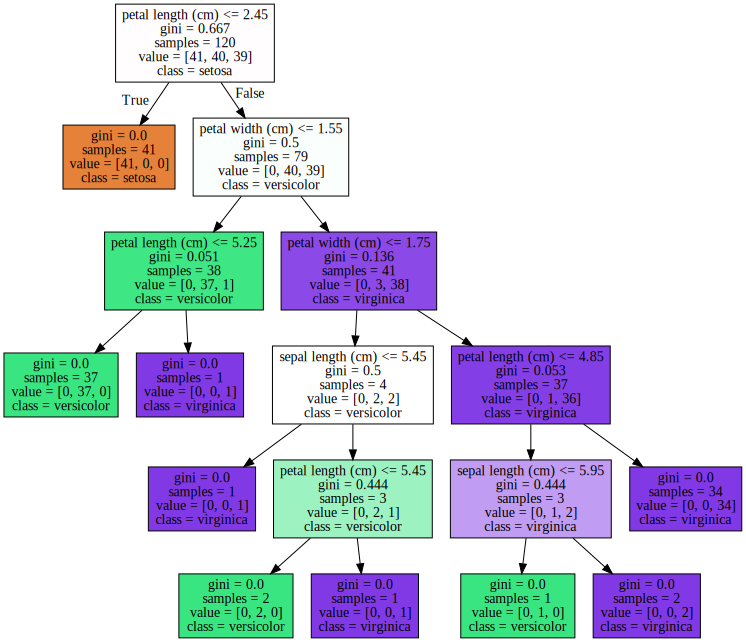

In [5]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


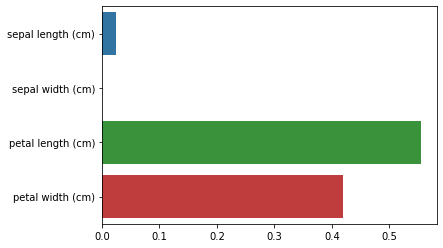

In [6]:
import seaborn as sns
import numpy as np
%matplotlib inline

print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

# petal length가 제일 중요한 피쳐네

### 결정 트리 과적합

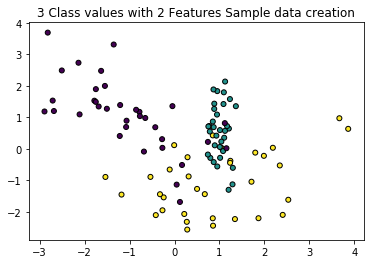

In [7]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolors='k')

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)

In [9]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

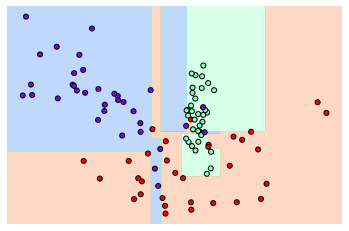

In [10]:
visualize_boundary(dt_clf, X_features, y_labels)

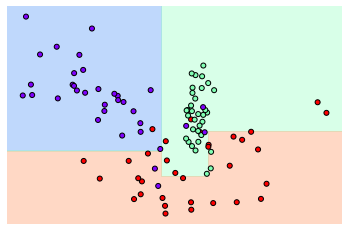

In [11]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+',
                             header=None, names=['column_index', 'column_name'])

feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:',feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [13]:
feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [14]:
import pandas as pd

def get_human_dataset():
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+',
                                 header=None, names=['column_index', 'column_name'])
    
    # 데이터 프레임에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = feature_name_df.iloc[:, 1].values.tolist()
    
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', header=None)
    X_train.columns = feature_name

    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', header=None)
    X_test.columns = feature_name
    
    
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [15]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [16]:
print('## 학습 피쳐 데이터셋 info()')
print(X_train.info())

## 학습 피쳐 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [17]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)

print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))


print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 156, 'splitter': 'best'}


In [19]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.7min finished


GridSearchCV 최고 평균 정확도 수치 : 0.8526
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 8}


In [20]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850925
1,8,0.852557
2,10,0.850925
3,12,0.844124
4,16,0.852149
5,20,0.851605
6,24,0.850245


- `mean_test_score`는 5개 CV 세트에서 검증용 데이터 세트의 정확도 평균 수치임
- max_depth가 깊어질수록 정확도가 미세하게 떨어지고 있음 -> 과적합

In [21]:
max_depths = [6,8,10,12,16,20,24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도 : {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도 : 0.8558
max_depth = 8 정확도 : 0.8707
max_depth = 10 정확도 : 0.8673
max_depth = 12 정확도 : 0.8646
max_depth = 16 정확도 : 0.8575
max_depth = 20 정확도 : 0.8548
max_depth = 24 정확도 : 0.8548


`max_depth`가 8일 경우 가장 높은 정확도를 나타냄.
깊어질수록 정확도가 감소하고 있음 -> overfitting

In [22]:
params = {
    'max_depth' : [8,12,16,20],
    'min_samples_split' : [16,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.0min finished


GridSearchCV 최고 평균 정확도 수치: 0.8550
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [23]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


- `best_estimator_`는 최적 하이퍼 파라미터로 학습이 완료된 Estimator 객체임

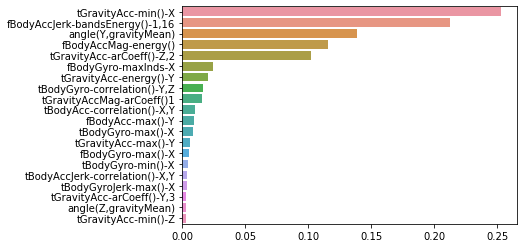

In [24]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 앙상블 학습

앙상블 학습을 통한 분류는 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법임.
- XGboost
- LightGBM
- 여러 가지 모델의 결과를 기반으로 메타 모델을 수립하는 Stacking


### 앙상블의 학습 유형
`Voting, Bagging, Boosting`이 있음.

- 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정함
- 보통의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합
- 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅 수행
    - 랜덤 포레스트 알고리즘
    - 개별 분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링해 추출하는데, 이렇게 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식을 `Bootstrapping (부트스트래핑) 분할 방식`이라고 함.
    - 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해서 최종 예측 결과를 선정하는 것이 배깅 앙상블 방식
    - 교차 검증이 데이터 세트 간에 중첩을 허용하지 않는 것과 다르게 **배깅 방식은 중첩을 허용함**
- 부스팅의 경우, 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에는 가중치를 부여하면서 학습과 ㅇ예측을 진행하는 방식임
    - 계속해서 분류기에게 가중치를 부스팅하면서 학습을 진행하기떄문에 부스팅 방식으로 불림
    - 예측 성능이 뛰어나 앙상블 학습을 주도하고 있으며, 대표적인 부스팅 모듈로 그래디언트 부스트, XGBoost, LightGBM 이 있음.
- 스태킹은 여러 가지 다른 모델의 에측 결과값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법

### 보팅 유형 - Hard Voting, Soft Voting

- Hard voting : 다수결 원칙과 비슷
    - 예측한 결과값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정하는 것
- Soft voting : 분류기의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정
- 일반적으로 소프트 보팅이 많이 사용됨


### 보팅 분류기(Voting Classifier)

사이킷런에서는 `VotingClassifier` 클래스 제공함


In [25]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft') # default = hard

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size=0.2, random_state=156)

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9561


In [27]:
classifiers = [lr_clf, knn_clf]

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


- 보팅과 스태킹 등은 서로 다른 알고리즘을 기반으로 하고 있지만, 배깅과 부스팅은 대부분 결정 트리 알고리즘을 기반으로 함.
- 결정 트리 알고리즘은 쉽고 직관적인 분류 기준을 가지고 있지만, 과적합이 발생하여 예측 성능이 떨어지는 현상이 발생하기 쉬움.
- 하지만 앙상블 학습에서는 이 같은 결정 트리 알고리즘의 단점을 매우 많은 분류기를 결합해 다양한 상황을 학습하게 함으로써 극복하고 있음.

## 랜덤 포레스트

배깅은 앞에서 소개한 보팅과 다르게, **같은 알고리즘**으로 여러 개의 분류기를 만들어 보팅으로 최종 결정하는 알고리즘임
- 대표적인 알고리즘 : 랜덤 포레스트
    - 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있고, 다양하 영역에서 높은 예측 성능을 보임


랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 됨.
- 개별적인 분류기의 기반 알고리즘은 결정 트리이지만, **개별 트리가 학습하는 데이터세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트임.**
    - Bootstrapping 분할 방식
    - (Bagging이 bootstrap aggregating의 줄임말임)


부트스트램은 통계학에서 여러 개의 작은 데이터 세트를 임의로 만들어 개별 평균의 분포도를 측정하는 등의 목적을 위한 샘플링 방식임.
- 랜덤 포레스트의 서브세트 데이터는 이러한 부트스트래핑으로 데이터가 임의로 만들어짐
- 서브세트의 데이터 건수는 전체 데이터 건수와 동일하지만, 개별 데이터가 중첩되어 만들어짐


```
bootstrap n_estimators=3


original : [1,2,3,4,5,6,7,8,9,10]
subset #1 : [1,2,3,3,3,5,6,8,8,9]
subset #2 : [1,3,4,5,6,8,8,9,9,10]
subset #3 : [1,1,3,4,4,5,6,6,9,9]
```

이렇게 데이터가 중첩된 개별 데이터 세트에 결정 트리 분류기를 각각 적용하는 것이 랜덤 포레스트임.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [29]:
def get_human_dataset():
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+',
                                 header=None, names=['column_index', 'column_name'])
    
    # 데이터 프레임에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = feature_name_df.iloc[:, 1].values.tolist()
    
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', header=None)
    X_train.columns = feature_name

    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', header=None)
    X_test.columns = feature_name
    
    
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [30]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9108


### 랜덤 포레스트 하이퍼 파라미터 및 튜닝

트리 기반 자체의 하이퍼 파라미터가 많은 데다 배깅, 부스팅, 학습, 정규화 등을 위한 하이퍼 파라미터까지 추가되므로 일반적으로 다른 ML 알고리즘에 비해 많을 수밖에 없음.

- 랜덤 포레스트에서의 하이퍼 파라미터
    - n_estimators : 결정 트리의 개수. 많이 설정할수록 좋은 성능을 기대할 수는 있지만 무조건은 X
    - max_features
    - max_depth, min_samples_leaf -> 과적합 제어

In [31]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=1,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'max_dep

In [32]:
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9166


In [33]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9196


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)


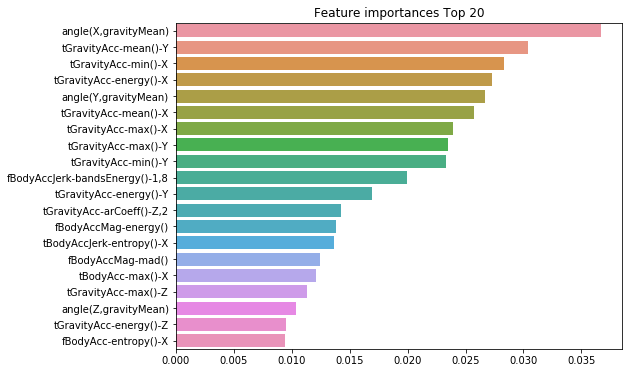

In [35]:
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## GBM(Gradient Boosting Machine)

부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
- AdaBoost, Gradien Boost
    - AdaBoost 에이다 부스트 : 오류 데이터에 가중치를 부여하면서 부스팅을 수행
    - GBM : 가중치 업데이트를 경사 하강법을 이용하는 것이 가장 큰 차이
        - 오류값 : 실제값 - 예측값
        - h(x) = y - F(x) 를 최소화하는 방향성을 가지고 반복적으로 가중치 값ㅇ르 업데이트하는 것이 경사하강법
        - GBM은 CART 기반의 다른 알고리즘과 마찬가지로 분류는 물론, 회귀도 가능. 
        - GradientBoostingClassifer 클래스 제공

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

In [37]:
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행시간: {0:.1f}초'.format(time.time() - start_time))

GBM 정확도: 0.9386
GBM 수행시간: 159.7초


- 수행 시간 문제는 GBM이 극복해야 할 문제...


gb_accuracyM 하이퍼 파라미터 및 튜닝

- loss : 경사 하강법에서 사용할 비용 함수
- learning_rate : GBM이 학습 진행할 때마다 적용하는 학습률
    - n_estimators와 상호 보완적으로 조합해 사용함
- n_estimators : weak learner 개수
- subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율

In [38]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,500],
    'learning_rate':[0.05,0.1]
}

grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 17.8min finished


최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도: 0.9014


In [39]:
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9396


인기있는 XGBoost, LightGBM이 GBM 기반 알고리즘이다